In [5]:
import pandas as pd
import matplotlib.pyplot as plt

from util import *

plt.style.use("ggplot")

In [6]:
df = pd.read_json("./data/preprocessed/preprocessed.json", orient="index")
with open("./data/preprocessed/param.json", "r") as f:
    params = json.load(f)
    print("params:", params)

user_n, item_n = params["user_n"], params["item_n"]

params: {'user_n': 1096, 'item_n': 3664}


{'Accuracy@10': 0.12151777137367917, 'Uplift@10': 0.01330321037158902, 'Accuracy@30': 0.04050592379122639, 'Uplift@30': 0.006657994816136291, 'Accuracy@100': 0.012151777137367916, 'Uplift@100': 0.004436535379968077}


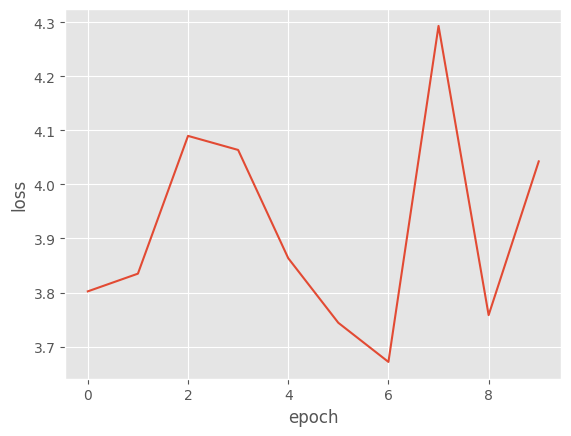

{'Accuracy@10': 0.12132564841498558, 'Uplift@10': 0.013163650626554987, 'Accuracy@30': 0.040441882804995194, 'Uplift@30': 0.006588147912041448, 'Accuracy@100': 0.012132564841498559, 'Uplift@100': 0.0043899930996336165}


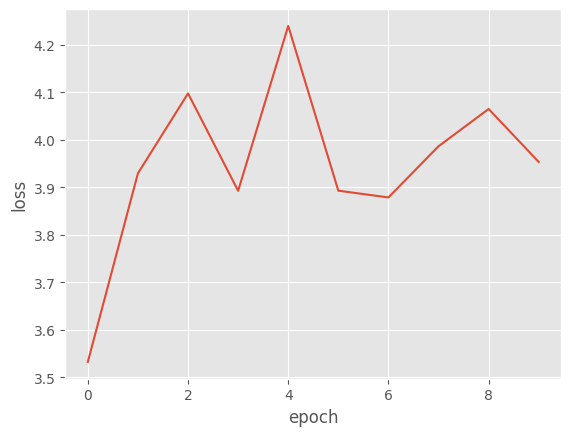

In [4]:
for sampling in ["accuracy-based-pointwise", "uplift-based-pointwise"]:
    args = Args(sampling=sampling, epochs=10_000, batch_size=1_000)

    X_u, X_v, losses = train_rmf(
        df=df,
        user_n=user_n,
        item_n=item_n,
        args=args,
    )

    rec_list = [np.matmul(X_u[u], X_v.T).argsort()[-100:].tolist() for u in range(user_n)]
    result = eval(
        rec_list=rec_list,
        df=df,
        top_k=[10, 30, 100],
        args=args,
    )
    print(result)

    add_record(args=args, evaluations=result)

    plt.plot(losses)
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.show()